In [1]:
import tensorflow as tf 

In [2]:
tf. __version__

'2.18.0'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
##divide the dataset into independent and dependent feature

In [5]:
x = dataset.iloc[:,3:12]

y = dataset.iloc[:,-1]


In [6]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
0,619,France,Female,42,2,0.00,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1
2,502,France,Female,42,8,159660.80,3,1,0
3,699,France,Female,39,1,0.00,2,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1


In [7]:
#feature engineering part
geography = pd.get_dummies(x['Geography'],drop_first = True)
gender = pd.get_dummies(x['Gender'],drop_first = True)
geography = geography.astype(int)
gender = gender.astype(int)

In [8]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [10]:
##concate these variable with dataframe

In [11]:
x = x.drop(['Geography','Gender'],axis = 1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
0,619,42,2,0.00,1,1,1
1,608,41,1,83807.86,1,0,1
2,502,42,8,159660.80,3,1,0
3,699,39,1,0.00,2,0,0
4,850,43,2,125510.82,1,1,1


In [12]:
pd.concat([x,geography,gender],axis = 1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,0,0,0
1,608,41,1,83807.86,1,0,1,0,1,0
2,502,42,8,159660.80,3,1,0,0,0,0
3,699,39,1,0.00,2,0,0,0,0,0
4,850,43,2,125510.82,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,0,0,1
9997,709,36,7,0.00,1,0,1,0,0,0
9998,772,42,3,75075.31,2,1,0,1,0,1


In [13]:
##train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)

In [14]:
#Feature Sacling
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
# StandardScaler is used to standardize features by scaling them to have a mean of 0 and standard deviation of 1.
# This ensures all features are on the same scale, preventing bias due to different ranges of values.

X_train = sc.fit_transform(X_train)## interview question
X_test = sc.transform(X_test)

In [15]:
X_train.shape

(8000, 7)

In [16]:
from tensorflow.keras.models import Sequential##by the help of sequential 
#we can do forward and backward
from tensorflow.keras.layers import Dense
#by the help of dense layer we can create hidden layer,input layer and output latyer
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
#activation layer use in hidden layer
from tensorflow.keras.layers import Dropout
##if drop out is .5 then 50% of hidden layer id randomly removed

In [17]:
## let initialize ANN
classifier = Sequential()

In [18]:
## Adding input layer
classifier.add(Dense(units = 7,activation = 'relu'))


In [59]:
## ading 1st hidden layer
classifier.add(Dense(units = 5,activation = 'relu'))
classifier.add(Dropout(0.2))
# if your training and validation losses are close, you may not need Dropout.
# Dropout is used to prevent overfitting in a neural network.

In [60]:
## ading 2st hidden layer
classifier.add(Dense(units = 4,activation = 'relu'))
classifier.add(Dropout(0.3))

In [61]:
## ading output layer
classifier.add(Dense(units = 1,activation = 'sigmoid'))


In [62]:
import tensorflow

In [63]:
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)
classifier.compile(optimizer = opt,loss = 'binary_crossentropy',metrics = ['accuracy'])
# The `metrics=['accuracy']` parameter is used to evaluate the model's performance during training and testing.
# It calculates the proportion of correct predictions, helping us understand how well the model is performing.

In [64]:
##early stoping 
# it is use to stop when accuracy is not  increasing
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [65]:
model_history =  classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)
# Batch size is the number of samples processed at a time, and epochs are the number of complete passes through the dataset.


Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8284 - loss: 0.4895 - val_accuracy: 0.8417 - val_loss: 0.3968
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8387 - loss: 0.4101 - val_accuracy: 0.8395 - val_loss: 0.4004
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8541 - loss: 0.3916 - val_accuracy: 0.8451 - val_loss: 0.3982
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8426 - loss: 0.3976 - val_accuracy: 0.8429 - val_loss: 0.3915
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8343 - loss: 0.4165 - val_accuracy: 0.8353 - val_loss: 0.4049
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8358 - loss: 0.4023 - val_accuracy: 0.8395 - val_loss: 0.3933
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8397 - loss: 0.4125 - val_accuracy: 0.8349 - val_loss: 0.3899
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8405 - loss: 0.3923 - 

In [42]:
model_history.history.keys()
# loss: The training loss for each epoch.
# accuracy: The training accuracy for each epoch (if applicable).This measures the accuracy of the model on the training data.
# val_loss: The validation loss for each epoch (if validation data is provided).
# val_accuracy: The validation accuracy for each epoch (if applicable).This measures the accuracy of the model on the validation data.

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 0, 'epoch')

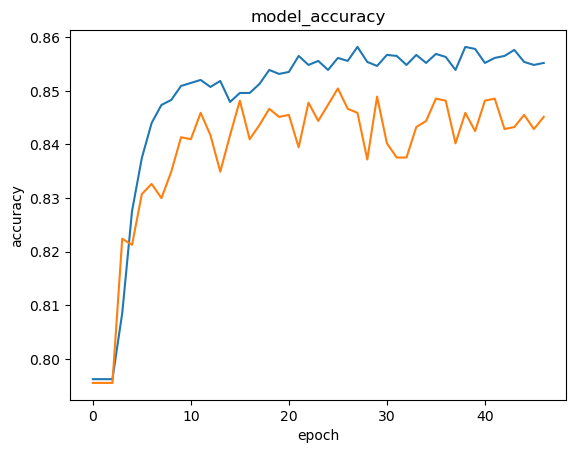

In [44]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# If the gap between training and validation accuracy widens too much, the model may be overfitting.

Text(0.5, 0, 'epoch')

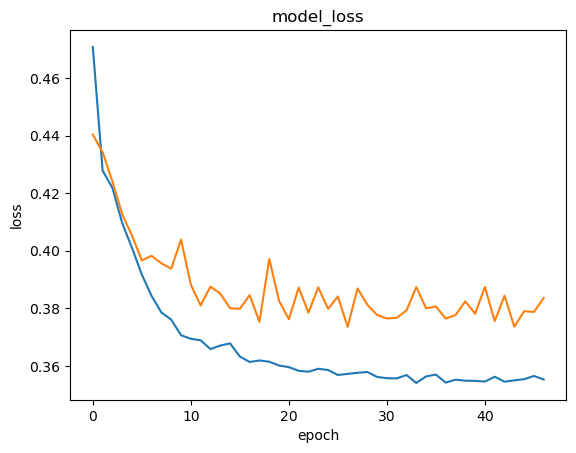

In [45]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# Ideally, both lines should improve together and converge closely, reflecting a well-generalized model.
# If the gap between training and validation accuracy widens too much, the model may be overfitting.

In [46]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [49]:
cm

array([[1536,   59],
       [ 241,  164]], dtype=int64)

In [54]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.85

In [56]:
##get the weight
classifier.get_weights()

[array([[ 1.65245116e-01,  7.81151205e-02, -6.48496687e-01,
         -2.41158962e-01,  2.65804559e-01, -9.20990169e-01,
          4.77721244e-02],
        [-3.26650786e+00, -6.81518972e-01, -5.65065324e-01,
         -1.50121200e+00,  2.94911588e-05, -1.21236336e+00,
          3.97721976e-01],
        [ 2.98743904e-01, -1.61149696e-01,  1.93716180e+00,
         -2.28288040e-01,  2.13167012e-01,  5.54295719e-01,
          1.64616719e-01],
        [-2.73920208e-01, -2.16768086e-01, -1.56270111e+00,
         -5.39677680e-01, -2.97500324e+00,  1.01597953e+00,
          4.29322749e-01],
        [-1.17090106e-01, -3.91098189e+00, -2.12763000e+00,
         -3.66516089e+00, -5.21421492e-01,  1.02272041e-01,
          3.60034227e+00],
        [ 3.53307724e-02, -2.41694853e-01,  1.57944843e-01,
         -6.59902468e-02,  3.75648528e-01,  1.00011349e-01,
          1.92509405e-02],
        [-1.06824827e+00, -2.08949804e+00, -5.99656880e-01,
          1.52321303e+00,  4.22263592e-01,  1.11802220e+00